#### [이미지 처리 - 이진화와 임계값] 

- 이미지를 특정 기준 값으로 픽셀값을 나누는 것
- 0과 1(255)로 나눈 경우 이진화라고 함!
- 픽셀 기준값은 이미지마다 다름, 이미지의 영역마다 다름

[1] 모듈 로딩 및 데이터 준비<hr>

In [187]:
# -------------------------------------------------------------------------
# 1-1. 모듈 로딩
# -------------------------------------------------------------------------
import cv2
import numpy as np
import matplotlib.pylab as plt
import koreanize_matplotlib

# -------------------------------------------------------------------------
# 1-2. 데이터 준비
# -------------------------------------------------------------------------
grayIMG = cv2.imread('../Data/Image/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

[2] 바이너리 이미지 만들기 <hr>

127.0


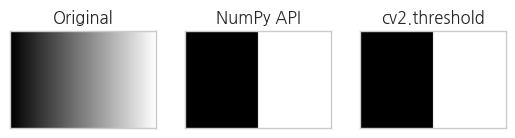

In [188]:
# -------------------------------------------------------------------------
# 2-1-1. NumPy API로 바이너리 이미지 만들기
# -------------------------------------------------------------------------
thresh_np = np.zeros_like(grayIMG)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ grayIMG > 127] = 255      # 127 보다 큰 값만 255로 변경

# -------------------------------------------------------------------------
# 2-2-2. OpenCV API로 바이너리 이미지 만들기
# -------------------------------------------------------------------------
ret, thresh_cv = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_BINARY) 
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# -------------------------------------------------------------------------
# 2-3. 원본과 결과물을 matplotlib으로 출력
# -------------------------------------------------------------------------
imgs = {'Original': grayIMG, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

[3] 스레시홀딩 플래그 실습 <HR>

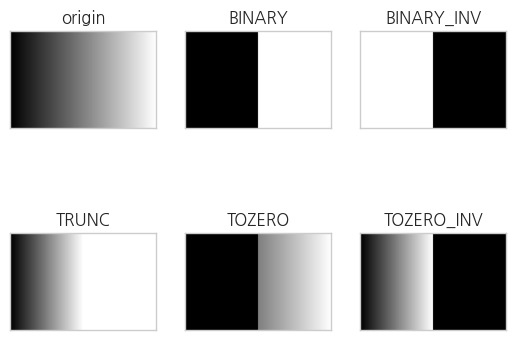

In [189]:
_, t_bin = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(grayIMG, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':grayIMG, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
        
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()

[4] 이미지 최적의 임계값(Threshold) 찾기 <hr>

In [190]:
# 스캔 이미지
FILE_NAME = '../Data/Image/sudoku.jpg'

# 이미지 로딩
scanIMG = cv2.imread(FILE_NAME, cv2.IMREAD_GRAYSCALE)

print(f"scanIMG : {scanIMG.shape}, pixel mean : {scanIMG.mean()}")

scanIMG : (291, 224), pixel mean : 124.13932866961217


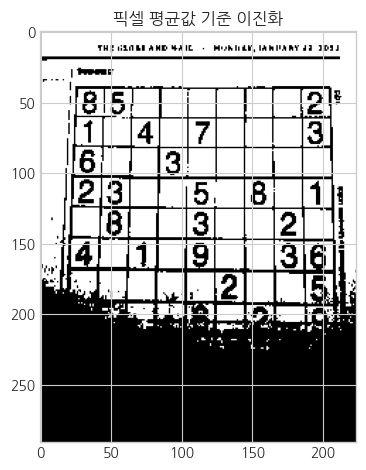

In [191]:
# 이진화 이미지 추출 => 최적의 임계값

THRESHOLD = round(scanIMG.mean())

_, outIMG = cv2.threshold(scanIMG, THRESHOLD, 255, cv2.THRESH_BINARY)

plt.imshow(outIMG, cmap='gray')
plt.title("픽셀 평균값 기준 이진화")
plt.tight_layout()
plt.show()

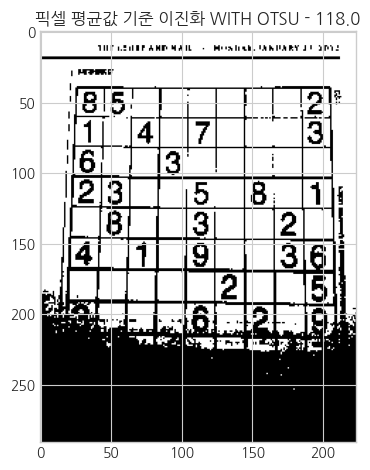

In [192]:
# --------------------------------------------------
# 오츠의 알고리즘 활용한 최적의 임계값 찾기
# --------------------------------------------------
THRESHOLD = round(scanIMG.mean())

bestTHRESH, outIMG = cv2.threshold(scanIMG, 
                                   THRESHOLD, 
                                   255, 
                                   cv2.THRESH_BINARY|cv2.THRESH_OTSU)

plt.imshow(outIMG, cmap='gray')
plt.title(f"픽셀 평균값 기준 이진화 WITH OTSU - {bestTHRESH}")
plt.tight_layout()
plt.show()

[5] 이미지 영역 분할 최적의 임계값(Threshold) 찾기 <HR>

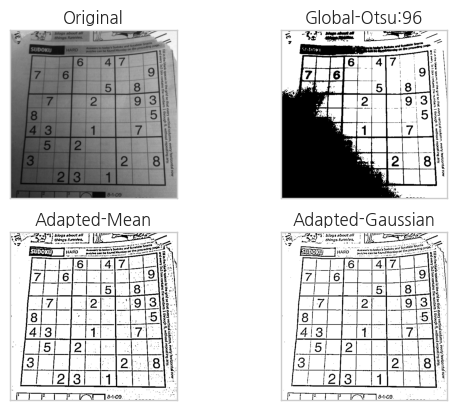

In [ ]:
# 스캔 이미지
FILE_NAME = '../Data/Image/sudoku.jpg'

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
imgGRAY = cv2.imread('../Data/Image/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용 - 1
ret, th1 = cv2.threshold(imgGRAY, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 적응형 쓰레시홀드를 평균과 가우시안 분포로 각각 적용 - 2
th2 = cv2.adaptiveThreshold(imgGRAY, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(imgGRAY, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# 시각화
imgs = {'Original': imgGRAY, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()